In [69]:
import pandas as pd

# Choose first 7 columns

In [70]:
df = pd.read_csv('../arun/Resources/diagnosis-of-covid-19-and-its-clinical-spectrum.csv')
cols = [
    'patient_age_quantile',
    'hematocrit',
    'hemoglobin',
    'platelets',
    'mean_platelet_volume',
    'red_blood_cells',
    'sars_cov_2_exam_result'
]

# Separate x and y parameters.

In [71]:
psars = df[cols].dropna()
sars = pd.get_dummies(psars)
X = sars.drop('red_blood_cells', axis=1)
y = sars['red_blood_cells'].values.reshape(-1, 1)
print(X.shape, y.shape)

(599, 7) (599, 1)


In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Rescale data.

In [73]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [74]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Fit the data.

In [75]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

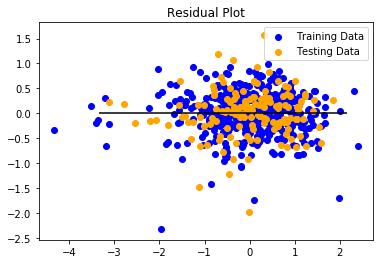

In [76]:
import matplotlib.pyplot as plt
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

# Compare with other models.

In [77]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.21102830405683976, R2: 0.780330279041239


In [78]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = lasso.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.21084105079638632, R2: 0.7805252001522068


In [79]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = ridge.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2110341829987774, R2: 0.780324159361982


In [80]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = elasticnet.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.21223963742947652, R2: 0.7790693426699573


In [85]:
X = psars.drop('sars_cov_2_exam_result', axis=1)
y = psars['sars_cov_2_exam_result']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8730512249443207
Testing Data Score: 0.8333333333333334


In [86]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative']
First 10 Actual labels: ['negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive']


In [88]:
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results['match'] = results['Prediction'] == results['Actual']
results

,Prediction,Actual,match
0,negative,negative,True
1,negative,negative,True
2,negative,negative,True
3,negative,positive,False
4,negative,negative,True
...,...,...,...
145,negative,positive,False
146,negative,negative,True
147,negative,negative,True
148,negative,negative,True


In [90]:
print('Percent Matching: ', 100 * results['match'].sum() / len(results))

Percent Matching:  83.33333333333333
